In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 KB 11.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 10.4 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
unique_genres = pd.read_csv("/home/bartek/University/DataSpeedScale/Assignment_1/results/unique_genres/000000_0", header=None, sep='\t')
unique_genres.columns = ["Artist", "Unique_genre_count"]

In [33]:
unique_genres.head()

,Artist,Unique_genre_count
0,David Guetta,15
1,Dua Lipa,13
2,Tiësto,13
3,blackbear,12
4,R3HAB,12


In [34]:
genre_count_distribution = unique_genres['Unique_genre_count'].value_counts()
genre_count_distribution

Unique_genre_count
1     24780
2      3489
3       949
4       347
5       141
6        62
7        41
8        17
9        14
10        7
11        6
12        4
13        2
15        1
Name: count, dtype: int64

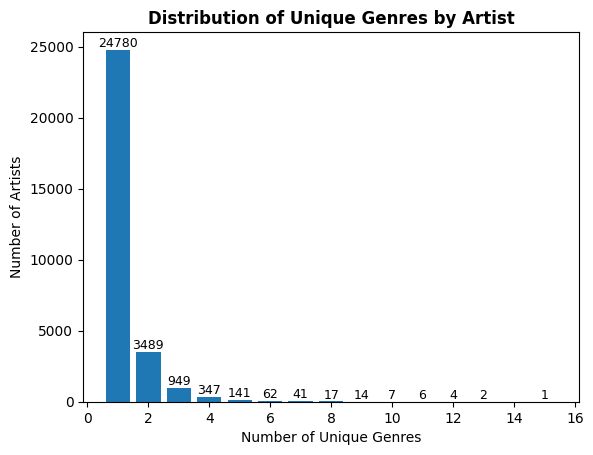

In [35]:
bars = plt.bar(genre_count_distribution.index, genre_count_distribution.values)
plt.xlabel('Number of Unique Genres')
plt.ylabel('Number of Artists')
plt.title('Distribution of Unique Genres by Artist', fontweight='bold')

for bar in bars:
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar_height, int(bar_height), ha='center', va='bottom', fontsize=9)
plt.savefig("visualisations/unique_genres_by_artist.png")

In [36]:
genre_danceability = pd.read_csv("/home/bartek/University/DataSpeedScale/Assignment_1/results/genre_danceability/000000_0", header=None, sep='\t')
genre_danceability.columns = ['Genre', 'Danceability']

In [37]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

In [38]:
genre_danceability['Danceability_range'] = pd.cut(genre_danceability['Danceability'], bins=bins, labels=labels)

In [39]:
dance_distribution = genre_danceability['Danceability_range'].value_counts().sort_index()

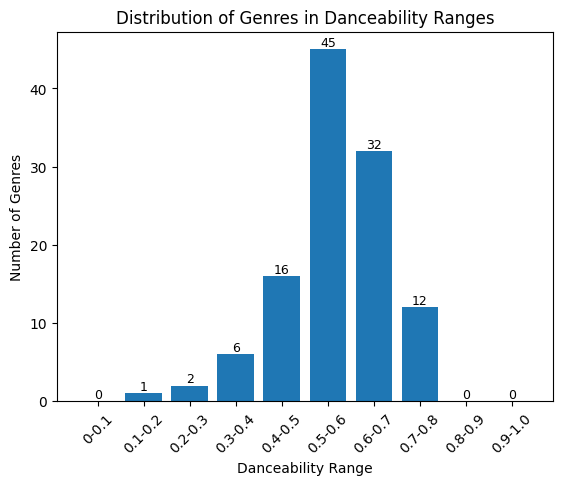

In [40]:
bars = plt.bar(dance_distribution.index, dance_distribution.values)
plt.xlabel('Danceability Range')
plt.ylabel('Number of Genres')
plt.title('Distribution of Genres in Danceability Ranges')

for bar in bars:
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar_height, int(bar_height), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.savefig("visualisations/danceability_distribution")

In [41]:
tempo_sample = pd.read_csv("/home/bartek/University/DataSpeedScale/Assignment_1/results/tempo_explicit_sample/000000_0", header=None, sep='\t')
tempo_sample.columns = ['Explicit', 'BPM', 'Count']

In [42]:
tempo_order = ['0-60 BPM', '60-90 BPM', '90-120 BPM', '120-150 BPM', '150-180 BPM', '180+ BPM']
tempo_sample['BPM'] = pd.Categorical(tempo_sample['BPM'], categories=tempo_order, ordered=True)

total_counts = tempo_sample.groupby('Explicit')['Count'].transform('sum')
tempo_sample['proportion'] = tempo_sample['Count'] / total_counts

In [43]:
tempo_sample = tempo_sample.pivot(index='BPM', columns='Explicit', values='proportion')

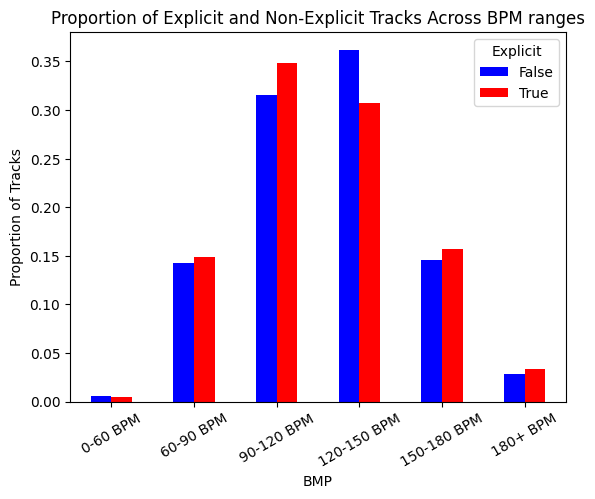

In [50]:
tempo_sample.plot(kind='bar', stacked=False, color=['blue', 'red'])
plt.xlabel('BMP')
plt.ylabel('Proportion of Tracks')
plt.title('Proportion of Explicit and Non-Explicit Tracks Across BPM ranges')
plt.xticks(rotation=30)
plt.savefig("visualisations/tempo_sample")